In [1]:
#step 1 of Project 1 Grace and Alexander 

In [19]:
from pathlib import Path 
import tarfile
import urllib.request

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [20]:
def load_income_data(): 
    return pd.read_csv("adult.csv")

Income = load_income_data()

In [21]:
Income.head(5) 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [22]:
Income.info()
#total of 15 columns with 32651 rows
#There are no missing values
#6 of the columns have int as the datatype 
#9 of the columns have an object datatype 
#Our response column, income, is qualitative not quantitative. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
Income.describe()
#Columns are on different scales while capital.gain and capital.loss appear to similar even though having big gap between maxes
#Age and hours.per.week may be similar also 

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


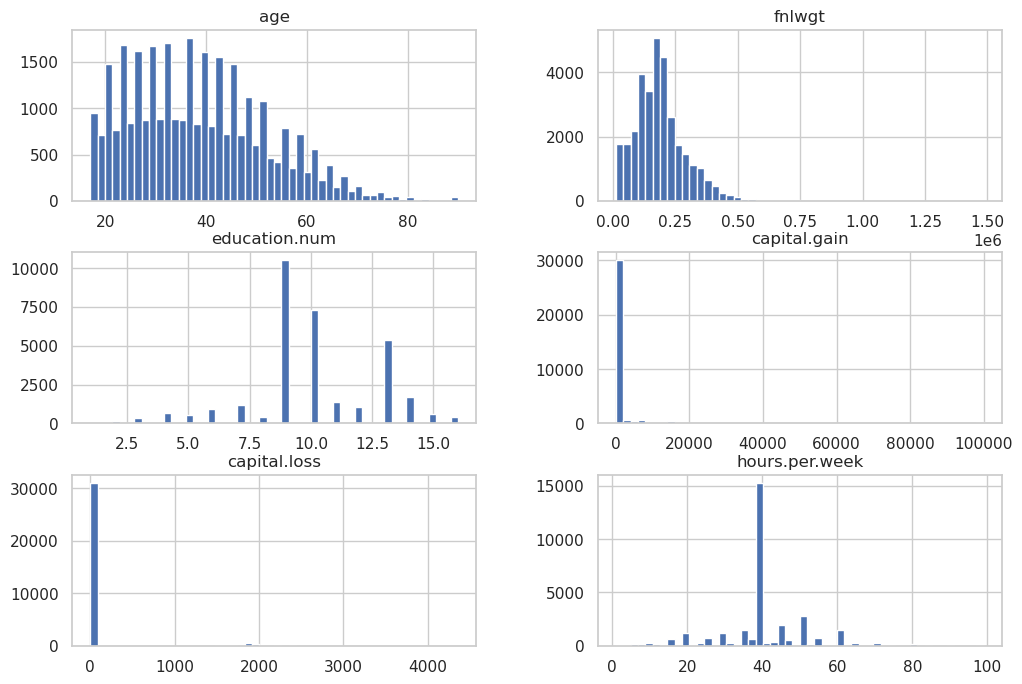

In [24]:
Income.hist(bins=50, figsize=(12, 8))
plt.show()

in plots capital.loss, capital.gain, and fnl.weight are all heavily right skewed. It is hard to drive any conclusions from capital gain and loss as the majority of the values are 0. 

In [25]:
def display_object_value_counts(Income):
    object_columns = Income.select_dtypes(include=['object'])

    for column in object_columns:
        print(f"Column: {column}")
        print(Income[column].value_counts())
        print("\n")

display_object_value_counts(Income)
# There are three columns that have the value '?', these columns are workclass, occupation, and native.country
# For now we have decided to leave the value as is but if we need further investigation we can always change the value to 'Unknown' for example. 
# Our response column only has 2 values 

Column: workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


Column: education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


Column: marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64


Column: occupation
Prof-specialty    

In [26]:
#Income['workclass'].replace('?', 'Unknown', inplace=True)
#Income['occupation'].replace('?', 'Unknown', inplace=True)
#Income['native.country'].replace('?', 'Unknown', inplace=True) 

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Income['income_encoded'] = label_encoder.fit_transform(Income['income'])

In [11]:
Income = pd.get_dummies(Income, columns=['race'], prefix=['race'])
Income = pd.get_dummies(Income, columns=['native.country'], prefix=['native.country'])
Income = pd.get_dummies(Income, columns=['sex'], prefix=['sex'])
Income = pd.get_dummies(Income, columns=['relationship'], prefix=['relationship'])
Income = pd.get_dummies(Income, columns=['occupation'], prefix=['occupation'])
Income = pd.get_dummies(Income, columns=['marital.status'], prefix=['marital.status'])
Income = pd.get_dummies(Income, columns=['education'], prefix=['education'])
Income = pd.get_dummies(Income, columns=['workclass'], prefix=['workclass'])

In [12]:
Income.head(5)
#considering that there are a lot of qualitative columns I thought it was best to one hot our columns 
#Now each value in a qualitative column has their own column

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,income_encoded,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,...,education_Some-college,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay
0,90,77053,9,0,4356,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,82,132870,9,0,4356,18,<=50K,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,66,186061,10,0,4356,40,<=50K,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,54,140359,4,0,3900,40,<=50K,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,41,264663,10,0,3900,40,<=50K,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [13]:
Income.info()
#With one hotting all of our categorical columns the data set now has a lot of columns which may or may not prove to be useful in our model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 110 entries, age to workclass_Without-pay
dtypes: int64(7), object(1), uint8(102)
memory usage: 5.2+ MB


In [14]:
corr_matrix = Income.corr()
corr_matrix["income_encoded"].sort_values(ascending=False)
#marital.status_Married-civ-spouse has the most correlation 
#relationship_Husband and education.num also have some correlation to income_encoded

income_encoded                       1.000000
marital.status_Married-civ-spouse    0.444696
relationship_Husband                 0.401035
education.num                        0.335154
age                                  0.234037
                                       ...   
occupation_Other-service            -0.156348
relationship_Not-in-family          -0.188497
sex_Female                          -0.215980
relationship_Own-child              -0.228532
marital.status_Never-married        -0.318440
Name: income_encoded, Length: 109, dtype: float64

array([[<AxesSubplot:xlabel='income_encoded', ylabel='income_encoded'>,
        <AxesSubplot:xlabel='marital.status_Married-civ-spouse', ylabel='income_encoded'>,
        <AxesSubplot:xlabel='relationship_Husband', ylabel='income_encoded'>,
        <AxesSubplot:xlabel='education.num', ylabel='income_encoded'>],
       [<AxesSubplot:xlabel='income_encoded', ylabel='marital.status_Married-civ-spouse'>,
        <AxesSubplot:xlabel='marital.status_Married-civ-spouse', ylabel='marital.status_Married-civ-spouse'>,
        <AxesSubplot:xlabel='relationship_Husband', ylabel='marital.status_Married-civ-spouse'>,
        <AxesSubplot:xlabel='education.num', ylabel='marital.status_Married-civ-spouse'>],
       [<AxesSubplot:xlabel='income_encoded', ylabel='relationship_Husband'>,
        <AxesSubplot:xlabel='marital.status_Married-civ-spouse', ylabel='relationship_Husband'>,
        <AxesSubplot:xlabel='relationship_Husband', ylabel='relationship_Husband'>,
        <AxesSubplot:xlabel='education.

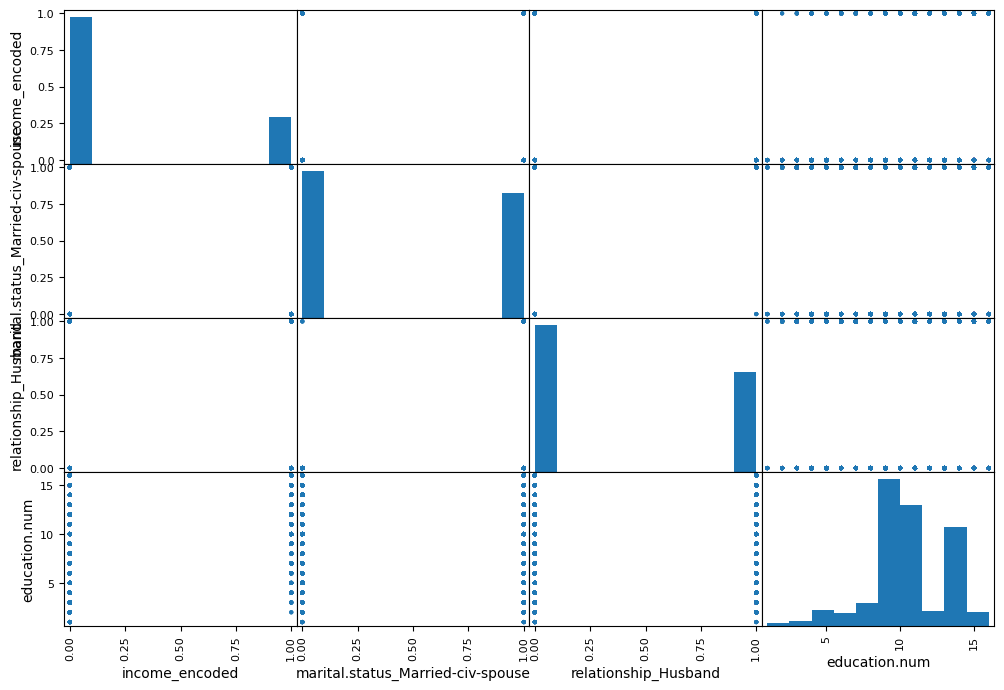

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["income_encoded", "marital.status_Married-civ-spouse", "relationship_Husband",
 "education.num"]
scatter_matrix(Income[attributes], figsize=(12, 8))
#Given that our response column is one hotted it is hard to read and draw conclusions in the scatter_matrix
#another way of plotting the data is needed to get better insight 

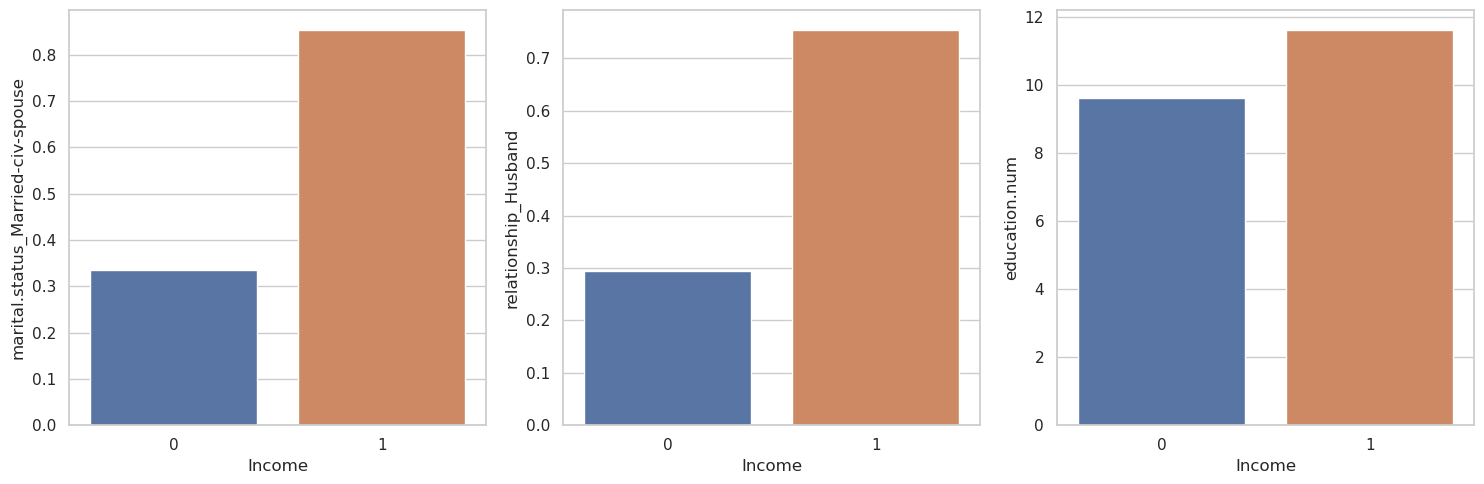

In [16]:
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Numeric attributes to visualize
numeric_attributes = ["marital.status_Married-civ-spouse", "relationship_Husband", "education.num"]

# Iterate through the numeric attributes and create grouped bar charts
for i, attribute in enumerate(numeric_attributes):
    ax = axes[i]
    sns.barplot(data=Income, x="income_encoded", y=attribute, ax=ax, errorbar=None)
    ax.set_xlabel("Income")
    ax.set_ylabel(attribute)

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()
#in the bar charts we are able to see that those who are married with civilian spouse are more likely to have an income over 50k 
#Similar with marital.status_Married-civ-spouse, for relation_Husband and education.num those who have a husband and higher years of education more often have an income higher than 50k

In [17]:
income_cat = Income.copy()
#housing_income_cat["income_cat"] = pd.cut(housing_income_cat["median_income"],
                                   #bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                   #labels=[1, 2, 3, 4, 5])

dftrain_strat, dftest_strat = train_test_split(
    income_cat, test_size=0.2, stratify=income_cat["income"], random_state=42)


def income_cat_proportions(data):
    return data["income"].value_counts() / len(data)

train_set, test_set = train_test_split(income_cat, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(income_cat),
    "Stratified %": income_cat_proportions(dftest_strat),
    "Random %": income_cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
<=50K,75.92,75.93,76.4,0.01,0.63
>50K,24.08,24.07,23.6,-0.03,-2.00
